# Bitcoin Halving Trends
The purpose is to see the Bitcoin price trends around the Bitcoin halving dates.  I chose 1 month before, and 5 months after halving date, to give a 6-month snapshot of Bitcoin prices.

The previous Bitcoin halving dates were November 28, 2012, July 9, 2016, and May 11, 2020.  The next expected halving date is estimated to be in April, 2022.

Historical data from Yahoo Finance only goes back to 09/17/2014, so the Nov 28, 2012 halving could not be analyzed.

In [105]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [106]:
# Enter your source files and halving dates in this list to create the graph.  
#  First field:  CSV name.  Second field:  Halving date in yyyy-mm-dd format.

generate_charts = [
    ['04-01-2020_09-30-2020.csv', '2020-05-11'],
    ['06-01-2016_12-31-2016.csv', '2016-07-09'] 
]

In [107]:
# Generates the halving charts.
def bitcoin_charts(csv_name, halving_date):
    
    # Reads CSV and puts it into a DataFrame and modifies the Date column
    file = f"resources/{csv_name}"
    bitcoin_df = pd.read_csv(file)
    bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"])

    # Puts user provided halving_date into a datetime format.
    halving_date = pd.to_datetime(halving_date).strftime('%m/%d/%Y')

    # Extracts only the High value from the dataframe, since this is only what is being charted.
    high_df = bitcoin_df[['Date', 'High']].set_index(["Date"])

    # Finds date range for CSV
    min_date = high_df.index.min().strftime('%m/%d/%Y')
    max_date = high_df.index.max().strftime('%m/%d/%Y')

    # Plots the chart to include halving date and annotations
    ax = high_df.plot(figsize=(12, 6))


    # Highlight Halving Date
    halving_price = int(high_df.loc[halving_date, "High"])

    ax.axvline(x=halving_date, color='r', linestyle='--')
    ax.annotate(f'Halving\n{halving_date}\n${halving_price}', 
                xy=(halving_date, high_df.loc[halving_date, 'High']), 
                xytext=(pd.to_datetime(halving_date) + pd.Timedelta(days=3), (ax.get_ylim()[0] + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]))), 
                color = "red"
                )


    # Set ticks every 7 days
    tick_dates = pd.date_range(min_date, high_df.index.max(), freq='7D')
    plt.xticks(tick_dates)

    # Get only the day of the month for tick labels
    tick_labels = [date.strftime('%m-%d') for date in tick_dates]
    plt.gca().set_xticklabels(tick_labels, rotation = 45, rotation_mode = "anchor", ha = "right")

    # Chart formatting
    plt.title(f"Bitcoin Price High ({min_date} - {max_date})", fontsize = 14)
    plt.xlabel(f"Date ({pd.to_datetime(min_date).year})", fontsize = 10)
    plt.ylabel("Bitcoin Price", fontsize = 10)
    plt.legend().set_visible(False)
    plt.grid(alpha=.7)
    plt.tight_layout()

    # Saves chart to /images/
    plt.savefig(f"images/Bitcoin-Halving_{pd.to_datetime(halving_date).strftime('%m-%d-%Y')}.png")

    plt.show()

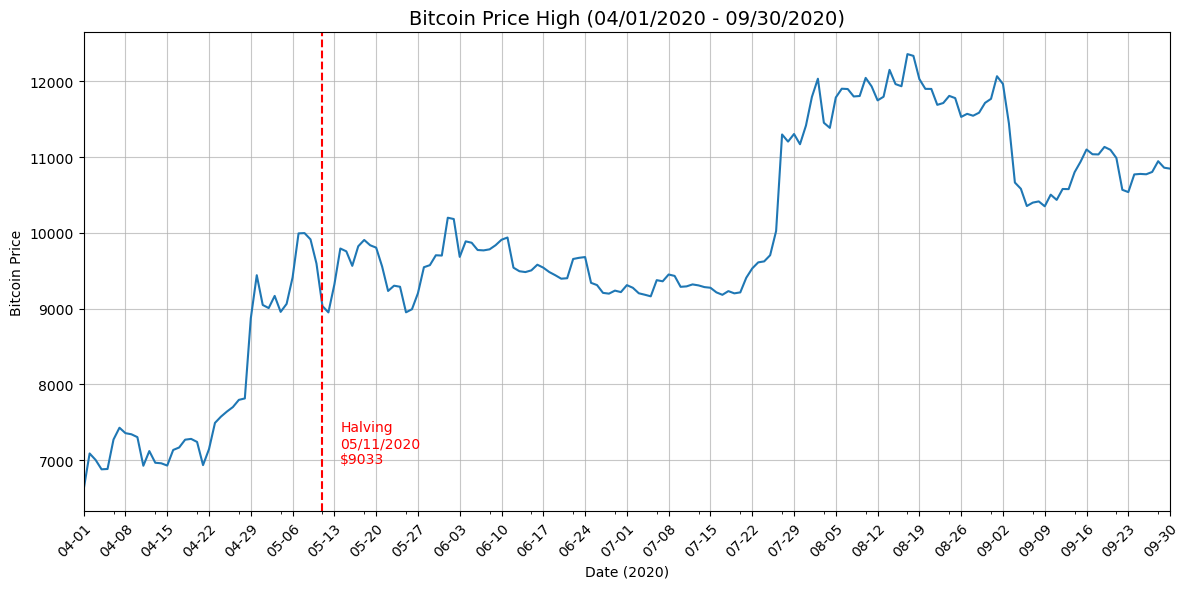

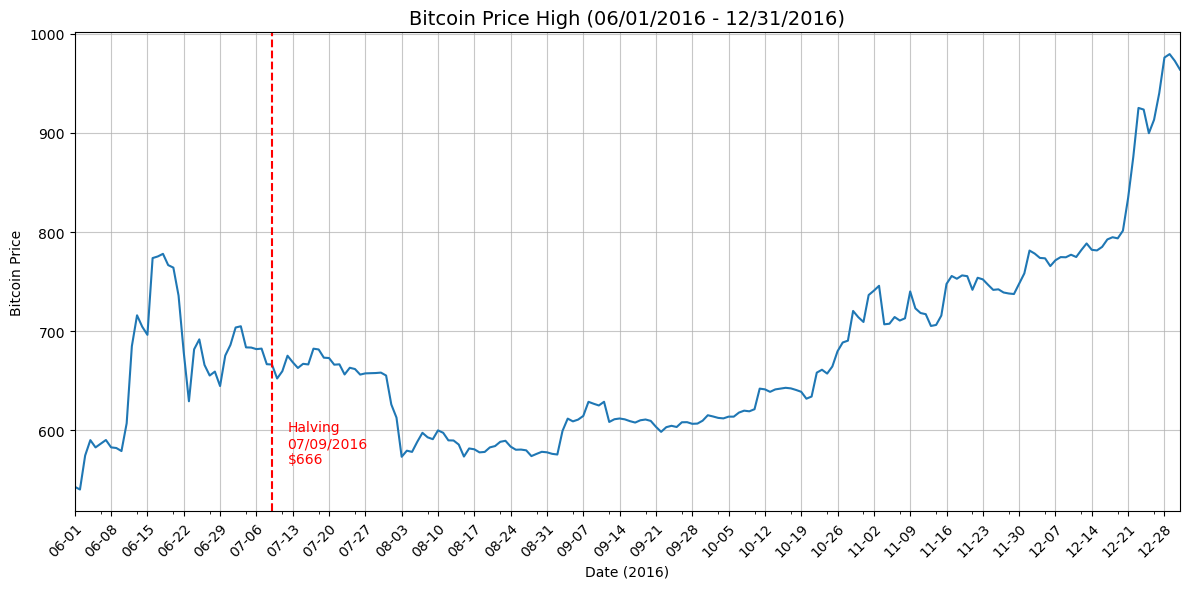

In [108]:
# Executes the request based on the list of CSV's and halving dates.

for chart in generate_charts:
    csv_name = chart[0]
    halving_date = chart[1]

    bitcoin_charts(csv_name, halving_date)
